# Introduction to Regression with an Artificial Neural Network

## Overview 
Neural networks play a crucial role in modern machine learning and artificial intelligence. In this workshop, we'll delve into the basics of neural networks using TensorFlow and Keras.


What we hope to do is tune a neural network to learn a simple function. The parameters we are going to tune are the number of epochs, the number of layers and the number of neurons in each layer.

## Setup and Prerequisites 

Before we begin, make sure you have Python and the necessary libraries installed. If you encounter any issues, feel free to ask for assistance.

In [2]:
# Note: The required libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers

## The Code
Summarize the key takeaways and provide resources for further learning.

Below is the complete code. Please edit and change until something breaks, that is where the learning begins.

75/75 [==============================] - 1s 4ms/step - loss: 0.2201
Test Loss: 0.2201


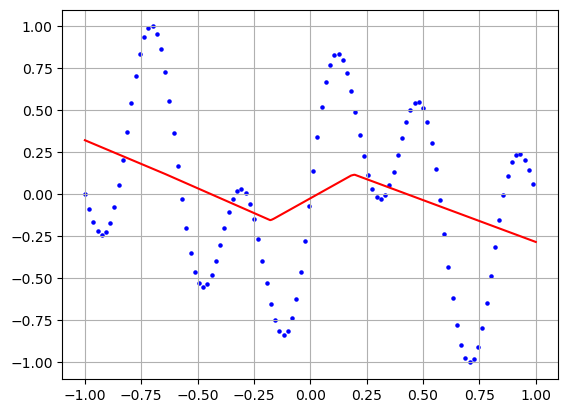

In [8]:
# The function we want our model to learn
def y(x):
    return (np.sin(2*np.pi*x) + np.sin(5*np.pi*x))

x_vals = np.arange(-1, 1, 0.00025)
y_vals = y(x_vals)

# Pre-processing (normalisation) of the data

y_max = y_vals.max()
y_vals /= y_max

x_vals = x_vals.reshape(-1, 1)

x_train, x_test, y_train, y_test = train_test_split(x_vals, y_vals, test_size=0.30)

# Building the architecture (remove the hashtags to add the layers)

model = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=(1,)),
    #layers.Dense(128, activation='relu'),
    #layers.Dense(64, activation='relu'),
    #layers.Dense(32, activation='relu'),
    #layers.Dense(16, activation='relu'),
    layers.Dense(1)  # Output layer
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model

model.fit(x_train, y_train, epochs=1, batch_size=30, validation_data=(x_test, y_test))

# Evaluating the models performance

predictions = model.predict(x_vals)
loss = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')


# Plotting the results

plt.figure()
plt.scatter(x_vals[::75], y_vals[::75],s=5, color='blue')
plt.plot(x_vals, predictions, color='red')
plt.grid()
plt.show()
